In [1]:
#clustering jerarquico y dendrogramas
#* X dataset (array de n x m) de puntos a clusterizar
#* n numero de datos
#* m numero de rangos
#* Z array de enlace con la informacion de las uniones
#* numero de clusters

In [2]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage
import numpy

(150, 2)


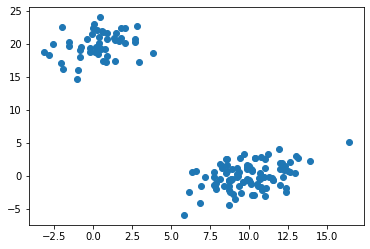

In [3]:
numpy.random.seed(4711)
a=numpy.random.multivariate_normal([10,0],[[3,1],[1,4]],size=[100,])
b=numpy.random.multivariate_normal([0,20],[[3,1],[1,4]],size=[50,])
X=numpy.concatenate((a,b))
print(X.shape)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [4]:
Z=linkage(X,"ward")

In [5]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [6]:
c, coph_dist=cophenet(Z,pdist(X))
c

0.9800148387574268

In [7]:
Z[152-len(X)]#cluster 152

array([33.        , 68.        ,  0.07106779,  2.        ])

In [8]:
#representacion de un dendrograma

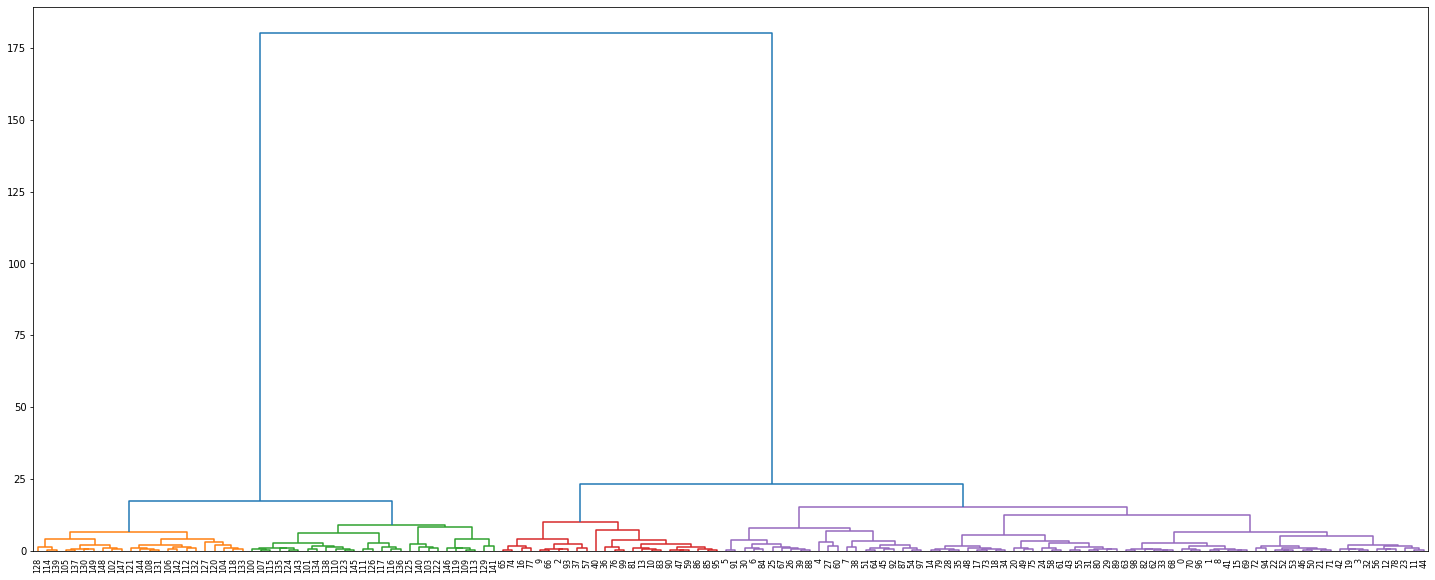

In [9]:
plt.figure(figsize=(25,10))
dendrogram(Z,leaf_rotation=90,leaf_font_size=8.0,color_threshold=0.1*160)
plt.show()

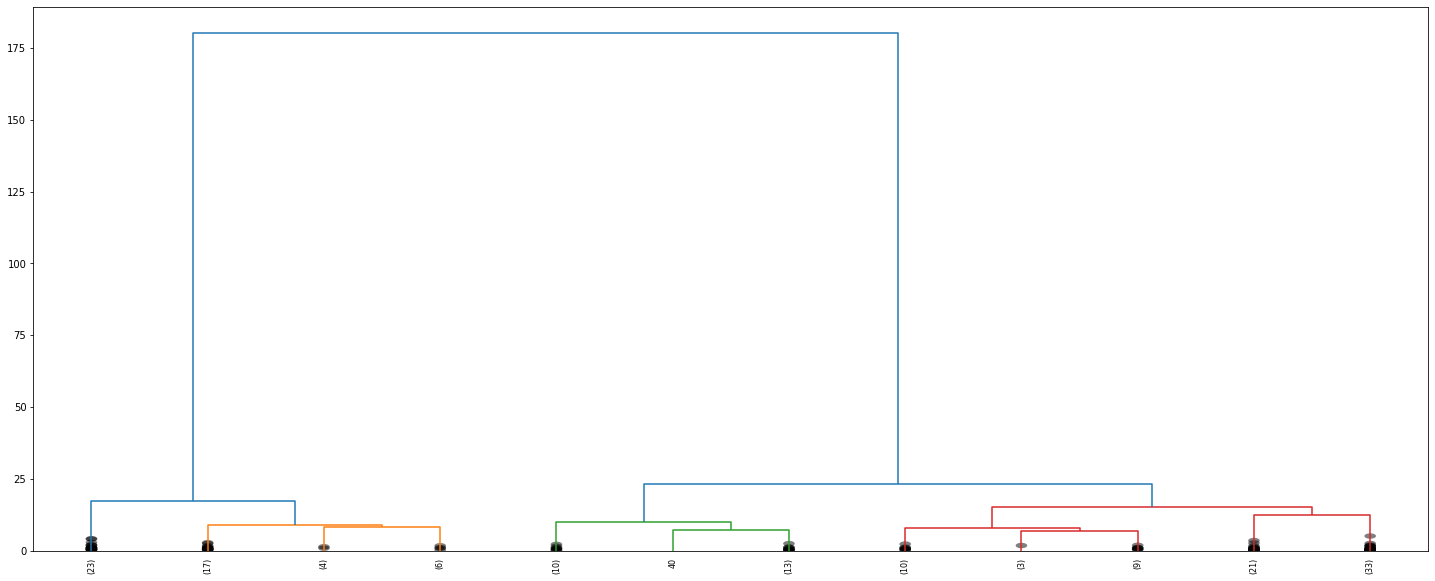

In [10]:
#Truncar el dendrograma 
plt.figure(figsize=(25,10))
dendrogram(Z,leaf_rotation=90,leaf_font_size=8.0,color_threshold=0.1*160,truncate_mode="lastp",p=12,show_leaf_counts=True,show_contracted=True)
plt.show()

In [11]:
#Dendrograma personalizado

In [12]:
def dendrogram_tune(*args,**kwargs):
    max_d=kwargs.pop("max_d",None)
    if max_d and "color_threshold" not in kwargs:
        kwargs["color_threshold"]=max_d
    annotate_above=kwargs.pop("annotate_above",0)
    ddata=dendrogram(*args,**kwargs)
    if not kwargs.get("no_plot",False):
        plt.ylabel("Distancia")
        for index, distance, color in zip(ddata["icoord"],ddata["dcoord"],ddata["color_list"]):
            x=0.5*sum(index[1:3])
            y=distance[1]
            if y>annotate_above:
                plt.plot(x,y,'o',c=color)
                plt.annotate("%.3g"%y,(x,y),xytext=(0,-5),textcoords="offset points",va="top",ha="center")
    if max_d:
        plt.axhline(y=max_d,c="k")

    return ddata


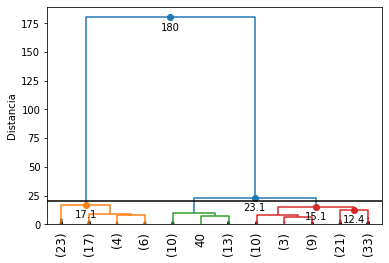

In [13]:
dendrogram_tune(Z,truncate_mode="lastp",p=12,leaf_rotation=90.0,leaf_font_size=12,show_contracted=True,annotate_above=12,max_d=20)
plt.show()

In [14]:
#corte automatico del dendrograma
#inconsistency_i=(h_i-avg(h_i))/std(h_j)

In [15]:
from scipy.cluster.hierarchy import inconsistent

In [16]:
depth=5
INCONS=inconsistent(Z,depth)
#print(INCONS) #promedio, desviacion estandar, numero de elementos, valor de inconsistencia para las uniones

In [17]:
#metodo del codo

[180.27043021  23.12198936  17.11527362  15.11533118  12.42734657
   9.84427829   8.74822275   8.04935282   7.86878542   7.11106083]


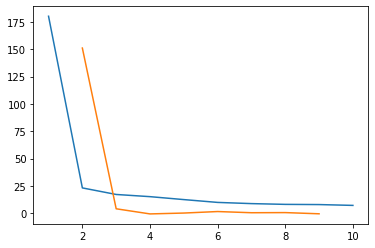

El numero optimo de cluster es 2


In [18]:
last=Z[-10:,2]
last_rev=last[::-1]
idx=numpy.arange(1,len(last)+1)
plt.plot(idx,last_rev)
print(last_rev)

acc=numpy.diff(last,2)
acc_rev=acc[::-1]
plt.plot(idx[:-2]+1,acc_rev)
plt.show()
k=acc_rev.argmax()+2
print("El numero optimo de cluster es %s"%str(k))

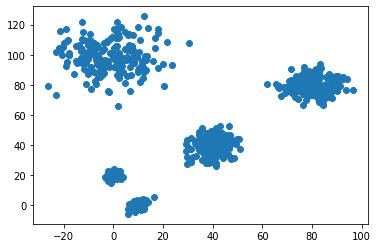

In [19]:
c=numpy.random.multivariate_normal([40,40],[[20,1],[1,30]],size=[200,])
d=numpy.random.multivariate_normal([80,80],[[30,1],[1,30]],size=[200,])
e=numpy.random.multivariate_normal([0,100],[[100,1],[1,100]],size=[200,])
X2=numpy.concatenate((X,d,c,e))
plt.scatter(X2[:,0],X2[:,1])
plt.show()

In [25]:
Z2=linkage(X2,"ward")

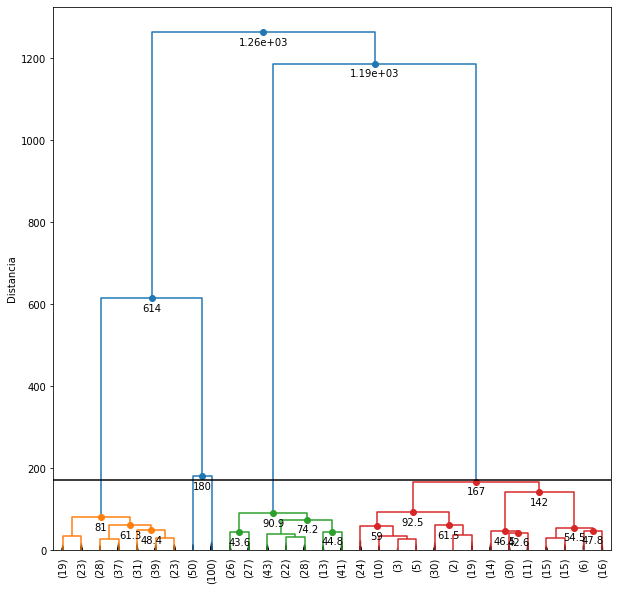

In [31]:
plt.figure(figsize=(10,10))
dendrogram_tune(
    Z2,
    truncate_mode="lastp",
    p=30,
    leaf_rotation=90.,
    leaf_font_size=10.,
    show_contracted=True,
    annotate_above=40,
    max_d=170
)
plt.show()

[1262.52130994 1186.7588235   614.06504667  180.27043021  166.66434658
  141.92437181   92.54599212   90.91214341   80.96733501   74.17015312]


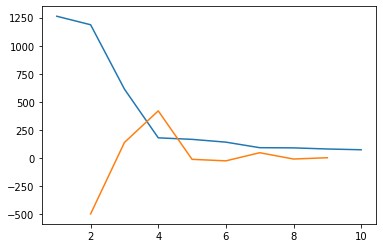

El numero optimo de cluster es 4


In [32]:
last=Z2[-10:,2]
last_rev=last[::-1]
idx=numpy.arange(1,len(last)+1)
plt.plot(idx,last_rev)
print(last_rev)

acc=numpy.diff(last,2)
acc_rev=acc[::-1]
plt.plot(idx[:-2]+1,acc_rev)
plt.show()
k=acc_rev.argmax()+2
print("El numero optimo de cluster es %s"%str(k))

In [33]:
print(inconsistent(Z2,5)[-10:])

[[ 13.99221995  15.56655759  30.           3.8658472 ]
 [ 16.73940735  18.56390061  30.           3.45982932]
 [ 19.05945013  20.53210626  31.           3.49952861]
 [ 19.25573887  20.8265769   29.           3.51907342]
 [ 21.36116189  26.77659523  30.           4.50255938]
 [ 36.58100874  37.08602393  31.           3.50761079]
 [ 12.12200256  32.15467931  30.           5.22936105]
 [ 42.61369802 111.38576865  31.           5.13038026]
 [ 81.75198678 208.31582073  31.           5.30447871]
 [147.25602023 307.95700562  31.           3.62149673]]


In [35]:
from scipy.cluster.hierarchy import fcluster

In [41]:
max_d=20
clusters=fcluster(Z,max_d,criterion="distance")
#len(clusters)
clusters

array([3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3,
       3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [42]:
K=3
clusters=fcluster(Z,K,criterion="maxclust")
clusters

array([3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3,
       3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [52]:
fcluster(Z,8,depth=10) #ele segundo parametro indica el numero minimo de clusters
#con inconsistencias depth=10 es el valor por defecto

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

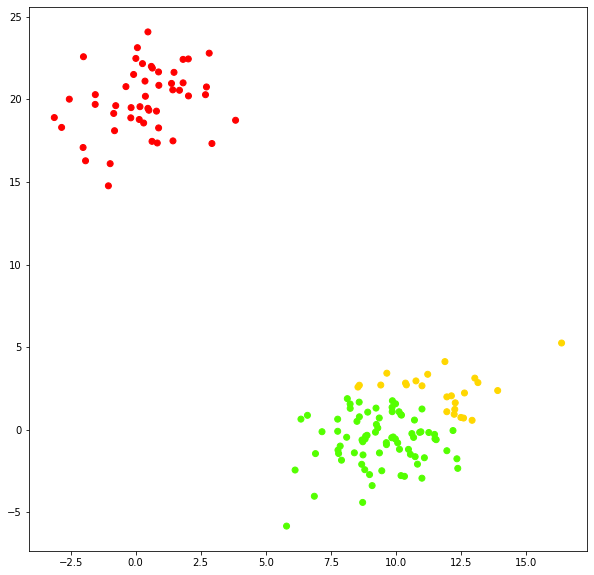

In [54]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,0],X[:,1],c=clusters,cmap="prism")
plt.show()

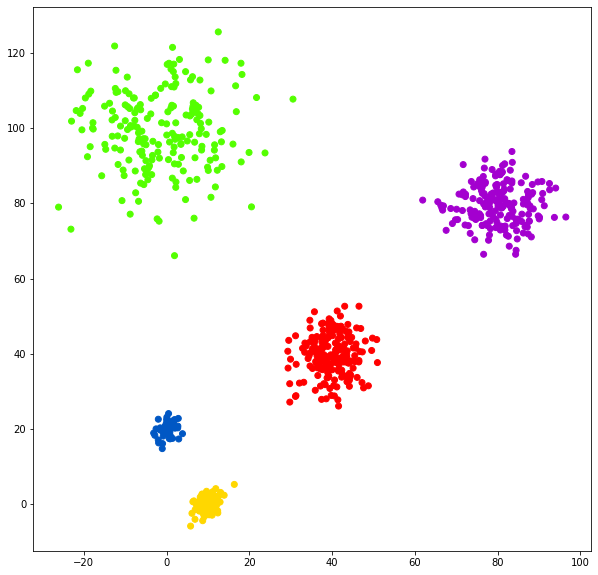

In [58]:
max_d=170
clusters=fcluster(Z2,max_d,criterion="distance")
plt.figure(figsize=(10,10))
plt.scatter(X2[:,0],X2[:,1],c=clusters,cmap="prism")
plt.show()